# **CAPSTONE PROJECT No 1 : Real Estate**

>DESCRIPTION

>Problem Statement
 

* A banking institution requires actionable insights into mortgage-backed 
securities, geographic business investment, and real estate analysis. 
* The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income and rental of the real estate.
* A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies.
* The dashboard must demonstrate relationships and trends for the key metrics as follows: number of loans, average rental income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics described here do not limit the dashboard to these few.

>Dataset Description
 

|Variables                      |             Description     |
|------------------------------ | ----------------------------|
|Second mortgage	              | Households with a second mortgage statistics
|Home equity	                  | Households with a home equity loan statistics
|Debt	                          | Households with any type of debt statistics
|Mortgage Costs                 |	Statistics regarding mortgage payments, home equity loans,utilities, and property taxes
|Home Owner Costs               |	Sum of utilities, and property taxes statistics
|Gross Rent	                    | Contract rent plus the estimated average monthly cost of utility features
|High school Graduation	        | High school graduation statistics
|Population Demographics        |	Population demographics statistics
|Age Demographics	              | Age demographic statistics
|Household Income	              | Total income of people residing in the household
|Family Income	                | Total income of people related to the householder

>Project Task: Week 1
Data Import and Preparation:

Import data.
Figure out the primary key and look for the requirement of indexing.
Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.
Exploratory Data Analysis (EDA):

    4. Perform debt analysis. You may take the following steps:

 a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

b) Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage c) Create pie charts to show overall debt and bad debt

d) Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

e) Create a collated income distribution chart for family income, house hold income, and remaining income

 

>Project Task: Week 2
Exploratory Data Analysis (EDA):

1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

a) Use pop and ALand variables to create a new field called population density

b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age c) Visualize the findings using appropriate chart type

2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

a) Analyze the married, separated, and divorced population for these population brackets

b) Visualize using appropriate chart type

3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

 

>Project Task: Week 3
Data Pre-processing:

1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent      random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain          insight into the linear relationships in the data. Following are the list of latent variables:

• Highschool graduation rates

• Median population age

• Second mortgage statistics

• Percent own

• Bad debt expense

 

>Project Task: Week 4
Data Modeling :

1. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly     mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

b) Run another model at State level. There are 52 states in USA.

c) Keep below considerations while building a linear regression model. Data Modeling :

• Variables should have significant impact on predicting Monthly mortgage and owner costs

• Utilize all predictor variable to start with initial hypothesis

• R square of 60 percent and above should be achieved

• Ensure Multi-collinearity does not exist in dependent variables

• Test if predicted variable is normally distributed

Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a) Box plot of distribution of average rent by type of place (village, urban, town, etc.).

b) Pie charts to show overall debt and bad debt.

c) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map.

d) Heat map for correlation matrix.

e) Pie chart to show the population distribution across different types of places (village, urban, town etc.)

Project done by :- [Siddhant Tondare](https://www.linkedin.com/in/siddhant-tondare-14285822a/)

Github Profile :-[GitHub](https://github.com/Siddhant-Tondare/Sid_Portfolio)


1.   Import Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Capstone Projects/Real Estate/train.csv')
df_test  = pd.read_csv('/content/drive/MyDrive/Capstone Projects/Real Estate/test.csv')

In [ ]:
df_train.head(3)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657


In [ ]:
df_test.head(3)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026


2. Figure out the primary key and look for the requirement of indexing

**Here By going through all the data UID is most likely the Primary key.**

3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [ ]:
# Missing Data in Train

miss_train = df_train.isna().sum()*100/len(df_train)
miss_train=pd.DataFrame(miss_train,columns=['Percantage of missing values'])
miss_train.sort_values(by=['Percantage of missing values'],inplace=True,ascending=False)
round(miss_train[miss_train['Percantage of missing values'] >0][:10],2)

#BLOCKID can be dropped, since it is 100% missing values


,Percantage of missing values
BLOCKID,100.0
hc_median,2.2
hc_sample_weight,2.2
hc_samples,2.2
hc_stdev,2.2
hc_mean,2.2
hc_mortgage_stdev,2.1
hc_mortgage_median,2.1
hc_mortgage_mean,2.1
hc_mortgage_sample_weight,2.1


In [ ]:
# Misssing Data in Test 
miss_test=df_test.isnull().sum() *100/len(df_train)
miss_test=pd.DataFrame(miss_test,columns=['Percantage of missing values'])
miss_test.sort_values(by=['Percantage of missing values'],inplace=True,ascending=False)
round(miss_test[miss_test['Percantage of missing values'] >0][:10],2)

#BLOCKID can be dropped, since it is 43% missing values

,Percantage of missing values
BLOCKID,42.86
hc_sample_weight,1.06
hc_samples,1.06
hc_stdev,1.06
hc_median,1.06
hc_mean,1.06
hc_mortgage_median,0.98
hc_mortgage_samples,0.98
hc_mortgage_sample_weight,0.98
hc_mortgage_stdev,0.98


In [ ]:
df_train.drop(columns=['BLOCKID','SUMLEVEL'],axis=1,inplace=True) 
#SUMLEVEL doest not have any predictive power and no variance

In [ ]:
df_test .drop(columns=['BLOCKID','SUMLEVEL'],axis=1,inplace=True)
#SUMLEVEL doest not have any predictive power

In [ ]:
# Imputing missing values with mean
missing_train_cols=[]
for col in df_train.columns:
  if df_train[col].isna().sum() !=0:
    missing_train_cols.append(col)
print(missing_train_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [ ]:
# Imputing missing values with mean
missing_test_cols=[]
for col in df_test.columns:
  if df_test[col].isna().sum() !=0:
    missing_test_cols.append(col)
print(missing_test_cols)


['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [ ]:
# Missing cols are all numerical variables
for col in df_train.columns:
  if col in (missing_train_cols):
    df_train[col].replace(np.nan, df_train[col].mean(),inplace=True)

In [ ]:
# Missing cols are all numerical variables
for col in df_test.columns:
  if col in (missing_test_cols):    
    df_test[col].replace(np.nan, df_test[col].mean(),inplace=True)

In [ ]:
print (df_train.isna().sum().sum())
print (df_test.isna().sum().sum())

0
0


## Exploratory Data Analysis (EDA):

4. Perform debt analysis. You may take the following steps:


a)  Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is
above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50
percent


In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=438083e4680446b3f191de7fbd707b1462a677da50218e62a999cfcc6e3f2930
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [ ]:
from pandasql import sqldf
q1 = "select place,pct_own,second_mortgage,lat,lng from df_train where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())
df_train_location_mort_pct=pysqldf(q1)

In [ ]:
df_train_location_mort_pct.head()

,place,pct_own,second_mortgage,lat,lng
0,Worcester City,0.20247,0.43363,42.254262,-71.800347
1,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
2,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
3,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
4,Lincolnwood,0.14228,0.28899,41.967289,-87.652434


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=go.Scattergeo(
    lat = df_train_location_mort_pct['lat'],
    lon = df_train_location_mort_pct['lng']),
    )
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')
fig.show()

#### b) Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage c) Create pie charts to show over

In [ ]:
df_train['bad_debt']=df_train['second_mortgage']+df_train['home_equity']-df_train['home_equity_second_mortgage']

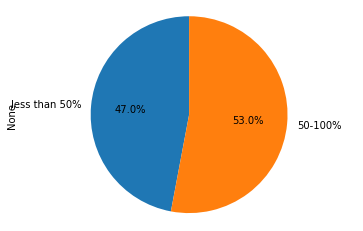

In [ ]:
df_train['bins'] = pd.cut(df_train['bad_debt'],bins=[0,0.10,1], labels=["less than 50%","50-100%"])
df_train.groupby(['bins']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

#### d) Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [ ]:
cols=[]
df_train.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

In [ ]:
#Taking Hamilton and Manhattan cities data
cols=['second_mortgage','home_equity','debt','bad_debt']
df_box_hamilton=df_train.loc[df_train['city'] == 'Hamilton']
df_box_manhattan=df_train.loc[df_train['city'] == 'Manhattan']
df_box_city=pd.concat([df_box_hamilton,df_box_manhattan])
df_box_city.head(4)

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,...,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,bins
0,267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,...,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408,less than 50%
391,263797,21,34,New Jersey,NJ,Hamilton,Yardville,City,tract,8610,...,24.05831,732.58443,3124.0,0.64400,0.56377,0.01980,0.00990,0.04892,0.18071,50-100%
1378,270979,17,39,Ohio,OH,Hamilton,Hamilton City,Village,tract,45015,...,22.66500,565.32725,2528.0,0.61278,0.47397,0.04419,0.02663,0.13741,0.15005,50-100%
1406,259028,95,28,Mississippi,MS,Hamilton,Hamilton,CDP,tract,39746,...,22.79602,483.01311,1954.0,0.83241,0.58678,0.01052,0.00000,0.11721,0.02130,less than 50%


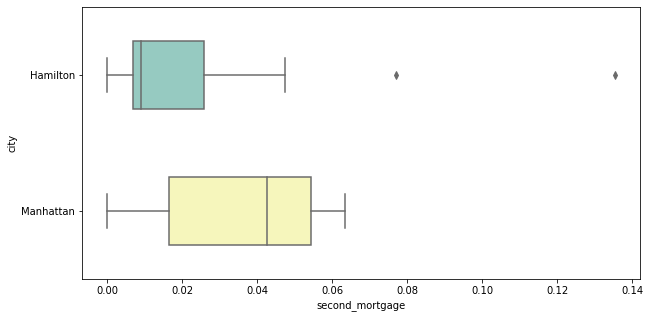

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='second_mortgage', y='city',width=0.5,palette="Set3")
plt.show()

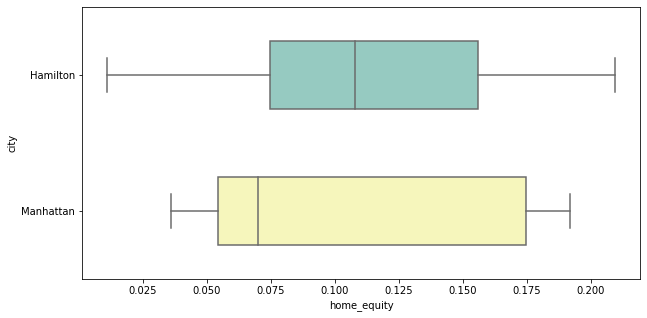

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='home_equity', y='city',width=0.5,palette="Set3")
plt.show()

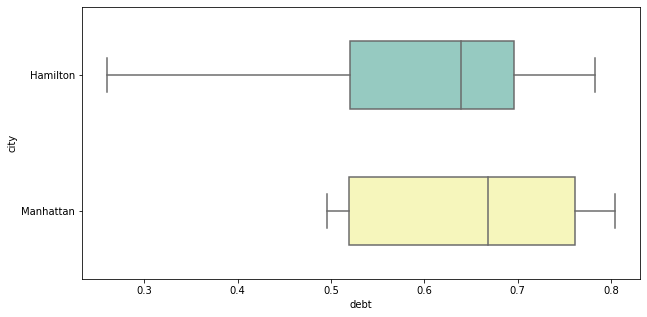

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='debt', y='city',width=0.5,palette="Set3")
plt.show()

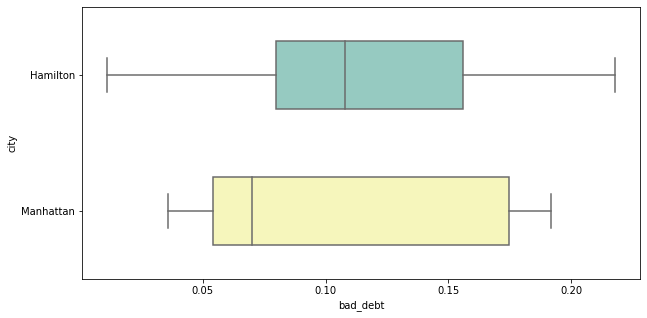

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='bad_debt', y='city',width=0.5,palette="Set3")
plt.show()

#### Manhattan has higher metrics compared to Hamilton

#### e) Create a collated income distribution chart for family income, house hold income, and remaining income

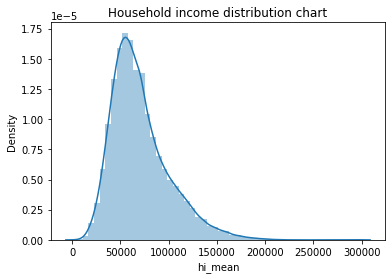

In [ ]:
sns.distplot(df_train['hi_mean'])
plt.title('Household income distribution chart')
plt.show()

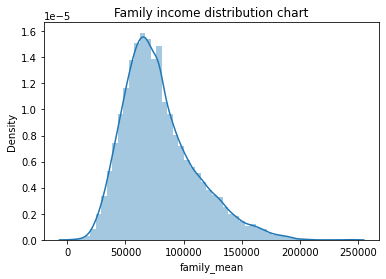

In [ ]:
sns.distplot(df_train['family_mean'])
plt.title('Family income distribution chart')
plt.show()

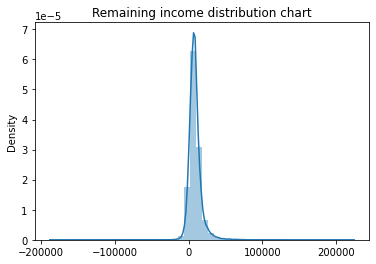

In [ ]:
sns.distplot(df_train['family_mean']-df_train['hi_mean'])
plt.title('Remaining income distribution chart')
plt.show()

### Exploratory Data Analysis (EDA):

#### 1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

<Figure size 1800x720 with 0 Axes>

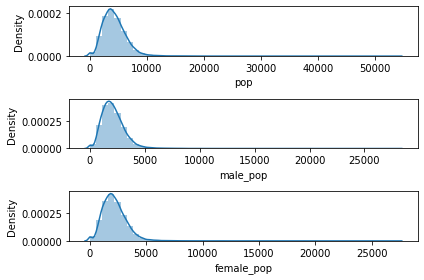

In [ ]:
plt.figure(figsize=(25,10))
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
sns.distplot(df_train['pop'],ax=ax1)
sns.distplot(df_train['male_pop'],ax=ax2)
sns.distplot(df_train['female_pop'],ax=ax3)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

<Figure size 1800x720 with 0 Axes>

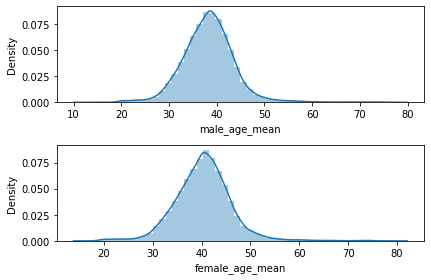

In [ ]:
plt.figure(figsize=(25,10))
fig,(ax1,ax2)=plt.subplots(2,1)
sns.distplot(df_train['male_age_mean'],ax=ax1)
sns.distplot(df_train['female_age_mean'],ax=ax2)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

#### a) Use pop and ALand variables to create a new field called population density


In [ ]:
df_train['pop_density']=df_train['pop']/df_train['ALand']

In [ ]:
df_test['pop_density']=df_test['pop']/df_test['ALand']

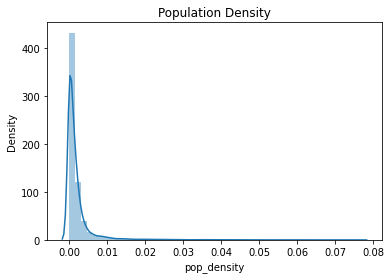

In [ ]:
sns.distplot(df_train['pop_density'])
plt.title('Population Density')
plt.show() # Very less density is noticed

#### b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age c) Visualize the findings using appropriate chart type

In [ ]:
df_train['age_median']=(df_train['male_age_median']+df_train['female_age_median'])/2
df_test['age_median']=(df_test['male_age_median']+df_test['female_age_median'])/2

In [ ]:
df_train[['male_age_median','female_age_median','male_pop','female_pop','age_median']].head()

,male_age_median,female_age_median,male_pop,female_pop,age_median
0,44.00000,45.33333,2612,2618,44.666665
1,32.00000,37.58333,1349,1284,34.791665
2,40.83333,42.83333,3643,3238,41.833330
3,48.91667,50.58333,1141,1559,49.750000
4,22.41667,21.58333,2586,3051,22.000000


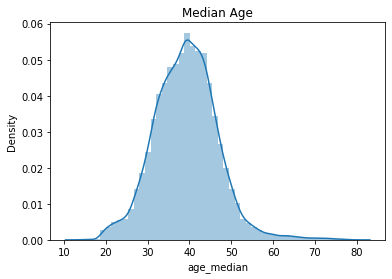

In [ ]:
sns.distplot(df_train['age_median'])
plt.title('Median Age')
plt.show()
# Age of population is mostly between 20 and 60
# Majority are of age around 40
# Median age distribution has a gaussian distribution
# Some right skewness is noticed

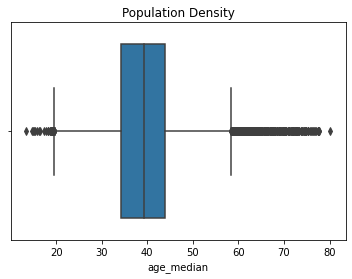

In [ ]:
sns.boxplot(df_train['age_median'])
plt.title('Population Density')
plt.show() 

#### 2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

In [ ]:
df_train['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [ ]:
df_train['pop_bins']=pd.cut(df_train['pop'],bins=5,labels=['very low','low','medium','high','very high'])

In [ ]:
df_train[['pop','pop_bins']]

,pop,pop_bins
0,5230,very low
1,2633,very low
2,6881,very low
3,2700,very low
4,5637,very low
...,...,...
27316,1847,very low
27317,4155,very low
27318,2829,very low
27319,11542,low


In [ ]:
df_train['pop_bins'].value_counts()

very low     27058
low            246
medium           9
high             7
very high        1
Name: pop_bins, dtype: int64

In [ ]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,27058,27058,27058
low,246,246,246
medium,9,9,9
high,7,7,7
very high,1,1,1


In [ ]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.507548  0.524680  0.019126  0.013650  0.100504  0.096020
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.503359  0.335660  0.008141  0.002500  0.039030  0.010320
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

##### 1.Very high population group has more married people and less percantage of separated and divorced couples
##### 2.In very low population groups, there are more divorced people


#### b) Visualize using appropriate chart type

<Figure size 720x360 with 0 Axes>

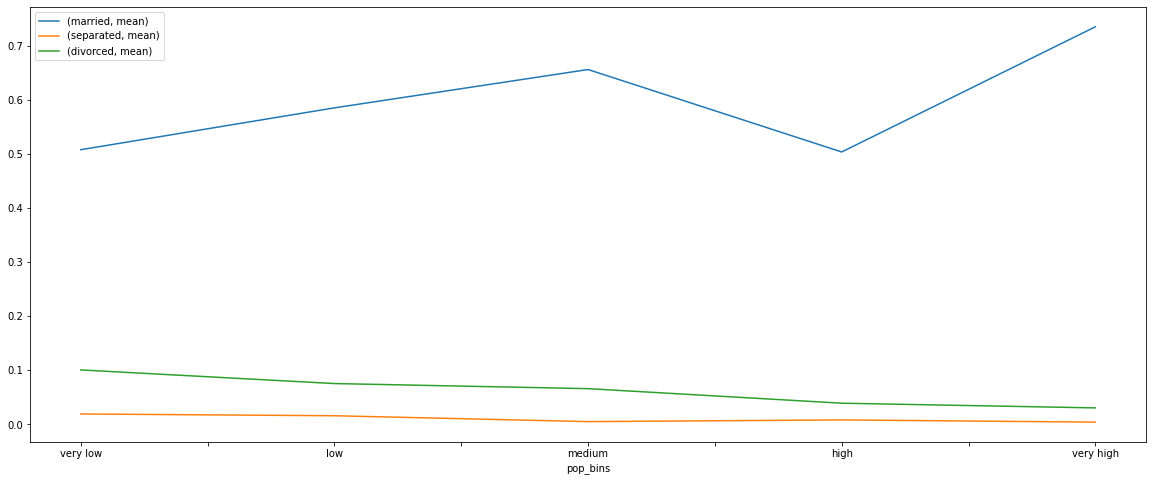

In [ ]:
plt.figure(figsize=(10,5))
pop_bin_married=df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(20,8))
plt.legend(loc='best')
plt.show()

#### 3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [ ]:
rent_state_mean=df_train.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

,mean
state,
Alabama,774.004927
Alaska,1185.763570
Arizona,1097.753511
Arkansas,720.918575
California,1471.133857


In [ ]:
income_state_mean=df_train.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head()

,mean
state,
Alabama,67030.064213
Alaska,92136.545109
Arizona,73328.238798
Arkansas,64765.377850
California,87655.470820


In [ ]:
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']
rent_perc_of_income.head(10)

state
Alabama                 0.011547
Alaska                  0.012870
Arizona                 0.014970
Arkansas                0.011131
California              0.016783
Colorado                0.013529
Connecticut             0.012637
Delaware                0.012929
District of Columbia    0.013198
Florida                 0.015772
Name: mean, dtype: float64

In [ ]:
#overall level rent as a percentage of income
sum(df_train['rent_mean'])/sum(df_train['family_mean'])

0.013358170721473864

In [ ]:
df_train.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

In [ ]:
cor=df_train[['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']].corr()

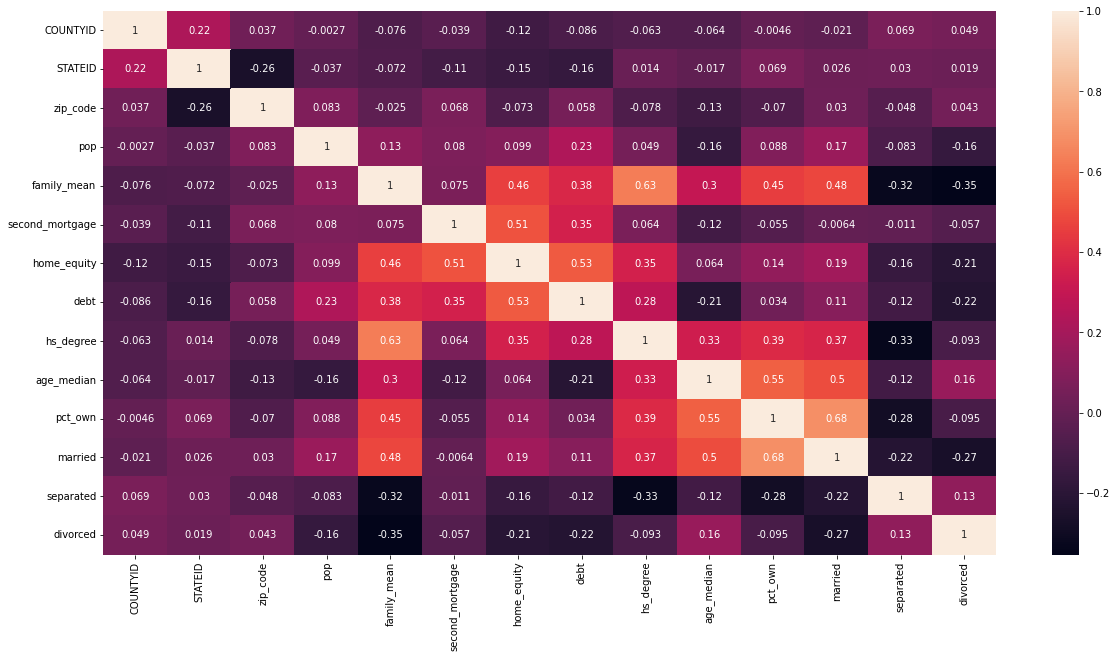

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)
plt.show()

##### 1.High positive correaltion is noticed between pop, male_pop and female_pop
##### 2.High positive correaltion is noticed between rent_mean,hi_mean, family_mean,hc_mean

### Data Pre-processing:

#### 1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. Following are the list of latent variables:

• Highschool graduation rates

• Median population age

• Second mortgage statistics

• Percent own

• Bad debt expense

In [ ]:
pip install factor-analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 842 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 55.4 MB/s 
     |████████████████████████████████| 8.8 MB 58.0 MB/s 
     |████████████████████████████████| 98 kB 10.0 MB/s 
     |████████████████████████████████| 468 kB 64.2 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=1319a8e40b08135aff49683082eb7634d3c77f97eecc2729aa9059977e361173
  Stored in directory: /root/.cache/pip/wheels/f5/8f/2e/a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built factor-analyzer


In [ ]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [ ]:
fa=FactorAnalyzer(n_factors=5)
fa.fit_transform(df_train.select_dtypes(exclude= ('object','category')))
fa.loadings_

array([[-0.0792116 ,  0.01842369, -0.00226993, -0.20615037,  0.12257519],
       [-0.10984742,  0.02069069, -0.02864267, -0.07473645,  0.04769891],
       [-0.1023931 ,  0.01738258,  0.01114895, -0.19315078,  0.13542829],
       [-0.08622374,  0.0503972 , -0.12586024, -0.03474273, -0.11990473],
       [ 0.01793293,  0.01939809,  0.0050148 ,  0.02432589, -0.00404004],
       [ 0.09338585, -0.09600445, -0.06490774, -0.14554334, -0.14514436],
       [-0.00633166, -0.03983021,  0.13510122, -0.00869713,  0.12448943],
       [-0.04107781, -0.02151263,  0.03726748, -0.08926393,  0.05508894],
       [-0.00171758, -0.01561247, -0.00212012, -0.0419514 ,  0.02096203],
       [ 0.08106245,  0.95705901, -0.08717159, -0.00931178, -0.04671674],
       [ 0.07608831,  0.91836258, -0.1085829 , -0.03001101, -0.04734035],
       [ 0.082143  ,  0.94745462, -0.06115376,  0.01212778, -0.04428319],
       [ 0.76885593,  0.00988416, -0.03762533,  0.11742661, -0.12008071],
       [ 0.71734364,  0.00632598, -0.0

### Data Modeling : Linear Regression

#### 1. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

In [ ]:
df_train.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

In [ ]:
df_train['type'].unique()
type_dict={'type':{'City':1, 
                   'Urban':2, 
                   'Town':3, 
                   'CDP':4, 
                   'Village':5, 
                   'Borough':6}
          }
df_train.replace(type_dict,inplace=True)

In [ ]:
df_train['type'].unique()

array([1, 2, 3, 4, 5, 6])

In [ ]:
df_test.replace(type_dict,inplace=True)

In [ ]:
df_test['type'].unique()

array([4, 1, 6, 3, 5, 2])

In [ ]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']

In [ ]:
x_train=df_train[feature_cols]
y_train=df_train['hc_mortgage_mean']

In [ ]:
x_test=df_test[feature_cols]
y_test=df_test['hc_mortgage_mean']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score

In [ ]:
x_train.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,age_median,pct_own,married,separated,divorced
0,53,36,13346,1,5230,67994.14790,0.02077,0.08919,0.52963,0.89288,44.666665,0.79046,0.57851,0.01240,0.08770
1,141,18,46616,1,2633,50670.10337,0.02222,0.04274,0.60855,0.90487,34.791665,0.52483,0.34886,0.01426,0.09030
2,63,18,46122,1,6881,95262.51431,0.00000,0.09512,0.73484,0.94288,41.833330,0.85331,0.64745,0.01607,0.10657
3,127,72,927,2,2700,56401.68133,0.01086,0.01086,0.52714,0.91500,49.750000,0.65037,0.47257,0.02021,0.10106
4,161,20,66502,1,5637,54053.42396,0.05426,0.05426,0.51938,1.00000,22.000000,0.13046,0.12356,0.00000,0.03109


In [ ]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

#### a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

In [ ]:
linereg=LinearRegression()
linereg.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred=linereg.predict(x_test_scaled)

In [ ]:
print("Overall R2 score of linear regression model", r2_score(y_test,y_pred))
print("Overall RMSE of linear regression model", np.sqrt(mean_squared_error(y_test,y_pred)))


Overall R2 score of linear regression model 0.7348210754610929
Overall RMSE of linear regression model 323.1018894984635


The Accuracy and R2 score are good, but still will investigate the model performance at state level

#### b) Run another model at State level. There are 52 states in USA.

In [ ]:
state=df_train['STATEID'].unique()
state[0:5]

array([36, 18, 72, 20,  1])

In [ ]:
for i in [20,1,45]:
    print("State ID-",i)
    
    x_train_nation=df_train[df_train['COUNTYID']==i][feature_cols]
    y_train_nation=df_train[df_train['COUNTYID']==i]['hc_mortgage_mean']
    
    x_test_nation=df_test[df_test['COUNTYID']==i][feature_cols]
    y_test_nation=df_test[df_test['COUNTYID']==i]['hc_mortgage_mean']
    
    x_train_scaled_nation=sc.fit_transform(x_train_nation)
    x_test_scaled_nation=sc.fit_transform(x_test_nation)
    
    linereg.fit(x_train_scaled_nation,y_train_nation)
    y_pred_nation=linereg.predict(x_test_scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID- 20
Overall R2 score of linear regression model for state, 20 :- 0.6046603766461809
Overall RMSE of linear regression model for state, 20 :- 307.9718899931475


State ID- 1
Overall R2 score of linear regression model for state, 1 :- 0.8104382475484616
Overall RMSE of linear regression model for state, 1 :- 307.8275861848435


State ID- 45
Overall R2 score of linear regression model for state, 45 :- 0.7887446497855252
Overall RMSE of linear regression model for state, 45 :- 225.69615420724134




In [ ]:
residuals=y_test-y_pred
residuals

0        281.969088
1        -69.935775
2        190.761969
3       -157.290627
4         -9.887017
            ...    
11704    -67.541646
11705    -41.578757
11706   -127.427569
11707   -330.820475
11708    217.760642
Name: hc_mortgage_mean, Length: 11709, dtype: float64

(array([6.000e+00, 3.000e+00, 2.900e+01, 7.670e+02, 7.823e+03, 2.716e+03,
        3.010e+02, 4.900e+01, 1.200e+01, 3.000e+00]),
 array([-2515.04284233, -1982.92661329, -1450.81038425,  -918.69415521,
         -386.57792617,   145.53830287,   677.65453191,  1209.77076095,
         1741.88698999,  2274.00321903,  2806.11944807]),
 <a list of 10 Patch objects>)

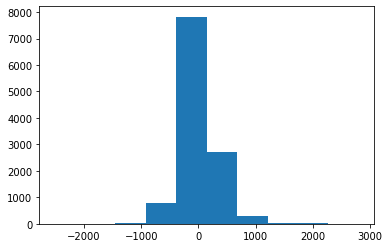

In [ ]:
plt.hist(residuals) 

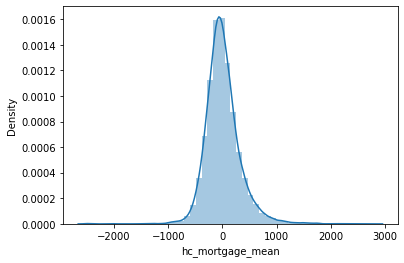

In [ ]:
sns.distplot(residuals)

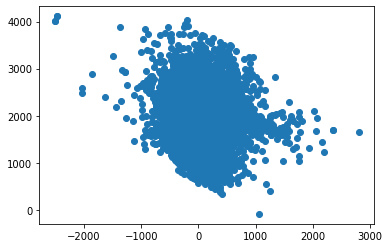

In [ ]:
plt.scatter(residuals,y_pred) 